In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense
from keras.layers import LSTM,BatchNormalization
from keras.layers import Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
import io

In [3]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
TheftData=pd.read_csv("D:\ElectricityTheft\Dataset\TunedElectricityDataset.csv")

In [5]:
#Converting the Categorical features
TheftData.head()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,...,10.120000,9.960000,16.920000,7.600000,27.220000,18.050000,26.470000,18.75000,17.840000,14.92000
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,...,8.836129,9.304656,10.758718,9.942215,11.173498,11.482926,11.656425,11.32268,11.015589,10.69165
3,B32AC8CC6D5D805AC053557AB05F5343,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,...,6.500000,9.990000,11.780000,18.590000,26.800000,18.570000,14.590000,12.82000,19.370000,15.92000
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.900000,3.420000,3.810000,4.5800,3.56000,4.250000,3.860000,3.530000,...,17.770000,10.370000,15.320000,13.510000,12.230000,14.680000,16.350000,18.14000,18.410000,17.31000


In [6]:
X = TheftData.iloc[:, 2:1036].astype('float32' )
y = TheftData.iloc[:, 1]

In [7]:
X

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,10.120000,9.960000,16.920000,7.600000,27.219999,18.049999,26.469999,18.750000,17.840000,14.920000
1,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,8.836129,9.304656,10.758718,9.942215,11.173497,11.482926,11.656425,11.322680,11.015589,10.691649
3,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,6.500000,9.990000,11.780000,18.590000,26.799999,18.570000,14.590000,12.820000,19.370001,15.920000
4,2.900000,3.420000,3.8100,4.580000,3.56000,4.250000,3.860000,3.530000,3.410000,0.850000,...,17.770000,10.370000,15.320000,13.510000,12.230000,14.680000,16.350000,18.139999,18.410000,17.309999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,4.250000,3.560000,3.380000,4.390000,3.720000,3.770000,3.960000,3.640000,3.400000,4.380000
42368,2.700000,4.390000,3.9500,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.810000,4.870000,4.480000,3.670000,3.310000,4.580000,3.330000,3.190000,4.570000,4.000000
42369,0.580000,0.840000,1.6100,0.900000,0.60000,0.820000,0.890000,0.030000,0.730000,1.680000,...,8.836129,0.660000,2.920000,2.360000,3.860000,4.280000,3.370000,6.670000,2.440000,1.150000
42370,16.889999,13.840000,13.5000,14.600000,14.46000,12.340000,15.370000,17.010000,13.460000,19.559999,...,21.129999,13.750000,22.610001,18.830000,25.520000,18.110001,19.309999,17.480000,17.200001,15.280000


In [8]:
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Assuming X_train and y_train are your training data
# X_train.shape = (n_samples, n_features), y_train.shape = (n_samples,)

# Initialize RandomOverSampler
ruSampling = RandomUnderSampler(random_state=40)

# Resample the training data
X_resampled, y_resampled = ruSampling.fit_resample(X, y)

# Now X_train_resampled and y_train_resampled are balanced


In [9]:
X_resampled

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
37128,7.168735,6.954202,6.784100,7.084301,10.516470,7.219634,7.341512,7.160004,6.839875,7.053545,...,8.836129,1.020000,0.350000,0.730000,0.560000,0.300000,0.670000,0.560000,0.440000,0.280000
36826,7.170000,10.340000,7.720000,5.590000,0.000000,6.800000,6.700000,7.590000,3.590000,3.320000,...,2.780000,2.900000,1.750000,2.880000,1.700000,3.780000,2.850000,2.980000,2.460000,3.260000
6687,13.240000,0.000000,0.000000,16.790001,14.900000,11.200000,9.100000,0.000000,8.550000,10.980000,...,23.110001,21.379999,24.940001,22.379999,24.690001,16.150000,23.879999,20.030001,22.219999,20.030001
34910,7.168735,6.954202,6.784100,7.084301,10.516470,7.219634,7.341512,7.160004,6.839875,7.053545,...,3.840000,3.810000,3.890000,3.810000,3.850000,3.860000,3.860000,3.870000,3.880000,3.870000
15657,7.168735,6.954202,6.784100,7.084301,10.516470,7.219634,7.341512,7.160004,6.839875,7.053545,...,0.040000,0.030000,0.030000,0.050000,0.030000,0.020000,0.030000,0.030000,0.030000,0.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,7.168735,6.954202,6.784100,7.084301,10.516470,7.219634,7.341512,7.160004,6.839875,7.053545,...,8.836129,9.304656,25.620001,9.942215,25.639999,28.969999,32.500000,30.639999,25.330000,21.639999
3611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.836129,9.304656,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.080000,0.090000
3612,7.168735,6.954202,6.784100,7.084301,10.516470,7.219634,7.341512,7.160004,6.839875,7.053545,...,17.580000,25.209999,17.459999,22.420000,20.790001,20.809999,17.709999,18.730000,21.820000,20.709999
3613,27.389999,67.309998,42.029999,46.040001,61.209999,67.169998,73.559998,47.090000,51.330002,72.919998,...,225.699997,198.490005,199.839996,187.919998,142.350006,132.320007,131.699997,151.339996,200.869995,187.210007


In [10]:
y_resampled

37128    0
36826    0
6687     0
34910    0
15657    0
        ..
3610     1
3611     1
3612     1
3613     1
3614     1
Name: FLAG, Length: 7230, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_resampled)
y_resampled = encoder.transform(y_resampled)


from sklearn.preprocessing import OneHotEncoder
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y_resampled.reshape(len(y_resampled), 1)
y_resampled = onehot_encoder.fit_transform(integer_encoded)
print(y_resampled)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25, random_state = 10)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train

array([[ 0.05834091, -0.06530057, -0.06416149, ..., -0.07479969,
        -0.06799942, -0.06705077],
       [-0.0863485 , -0.04138001, -0.01537601, ..., -0.06090456,
        -0.06044094, -0.06030325],
       [-0.14009888, -0.12599261, -0.11687075, ..., -0.07627943,
        -0.07776086, -0.06982709],
       ...,
       [ 0.07490267, -0.00473577,  0.01052085, ..., -0.05928045,
        -0.05318633, -0.04617564],
       [-0.05008227, -0.05290511, -0.0452738 , ..., -0.06833936,
        -0.06818933, -0.05963553],
       [-0.13693711, -0.09291099, -0.10810766, ..., -0.06530769,
        -0.0798119 , -0.07629346]], dtype=float32)

In [14]:
X_train.shape

(5422, 1034)

In [15]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [16]:
y_train.shape

(5422, 2)

In [17]:
X_test.shape

(1808, 1034)

In [18]:
y_test.shape

(1808, 2)

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Add input layer
model.add(layers.Input(shape=(1034,)))

# Add hidden layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))  # Adding dropout for regularization
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))

# Add output layer
model.add(layers.Dense(2, activation='softmax'))  # Adjust activation based on your task (e.g., 'softmax' for multi-class classification)

# Compile the model


# Print model summary

In [20]:
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train, y_train,validation_split=0.25, batch_size = 256, epochs = 200)

C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
16/16 [==============================] - 2s 44ms/step - loss: 0.7008 - accuracy: 0.4727 - val_loss: 0.6968 - val_accuracy: 0.4484
Epoch 2/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6924 - accuracy: 0.5108 - val_loss: 0.6901 - val_accuracy: 0.5339
Epoch 3/200
16/16 [==============================] - 0s 18ms/step - loss: 0.6866 - accuracy: 0.5347 - val_loss: 0.6851 - val_accuracy: 0.5605
Epoch 4/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6815 - accuracy: 0.5740 - val_loss: 0.6815 - val_accuracy: 0.5686
Epoch 5/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6772 - accuracy: 0.5721 - val_loss: 0.6790 - val_accuracy: 0.5693
Epoch 6/200
16/16 [==============================] - 0s 16ms/step - loss: 0.6746 - accuracy: 0.5885 - val_loss: 0.6771 - val_accuracy: 0.5715
Epoch 7/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6709 - accuracy: 0.5880 - val_loss: 0.6755 - val_accuracy: 0.5730
Epoch 

16/16 [==============================] - 0s 16ms/step - loss: 0.6173 - accuracy: 0.6579 - val_loss: 0.6366 - val_accuracy: 0.6232
Epoch 116/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6183 - accuracy: 0.6547 - val_loss: 0.6362 - val_accuracy: 0.6217
Epoch 117/200
16/16 [==============================] - 0s 16ms/step - loss: 0.6169 - accuracy: 0.6567 - val_loss: 0.6363 - val_accuracy: 0.6217
Epoch 118/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6167 - accuracy: 0.6596 - val_loss: 0.6361 - val_accuracy: 0.6202
Epoch 119/200
16/16 [==============================] - 0s 16ms/step - loss: 0.6175 - accuracy: 0.6567 - val_loss: 0.6358 - val_accuracy: 0.6224
Epoch 120/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6136 - accuracy: 0.6549 - val_loss: 0.6357 - val_accuracy: 0.6224
Epoch 121/200
16/16 [==============================] - 0s 16ms/step - loss: 0.6150 - accuracy: 0.6594 - val_loss: 0.6356 - val_accuracy: 0.6232
Epoch 

Epoch 172/200
16/16 [==============================] - 0s 15ms/step - loss: 0.5986 - accuracy: 0.6778 - val_loss: 0.6274 - val_accuracy: 0.6453
Epoch 173/200
16/16 [==============================] - 0s 16ms/step - loss: 0.6003 - accuracy: 0.6758 - val_loss: 0.6271 - val_accuracy: 0.6453
Epoch 174/200
16/16 [==============================] - 0s 17ms/step - loss: 0.5992 - accuracy: 0.6754 - val_loss: 0.6262 - val_accuracy: 0.6409
Epoch 175/200
16/16 [==============================] - 0s 20ms/step - loss: 0.6002 - accuracy: 0.6749 - val_loss: 0.6266 - val_accuracy: 0.6401
Epoch 176/200
16/16 [==============================] - 0s 18ms/step - loss: 0.5989 - accuracy: 0.6731 - val_loss: 0.6266 - val_accuracy: 0.6438
Epoch 177/200
16/16 [==============================] - 0s 17ms/step - loss: 0.5970 - accuracy: 0.6763 - val_loss: 0.6262 - val_accuracy: 0.6416
Epoch 178/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6001 - accuracy: 0.6771 - val_loss: 0.6260 - val_accuracy:

In [21]:
history.history['accuracy']

[0.47270044684410095,
 0.5108214616775513,
 0.5346778035163879,
 0.5740285515785217,
 0.5720610022544861,
 0.5885391235351562,
 0.588047206401825,
 0.5787014365196228,
 0.584604024887085,
 0.5841121673583984,
 0.5838661789894104,
 0.5875553488731384,
 0.5878012776374817,
 0.5932120084762573,
 0.5929660797119141,
 0.5902606844902039,
 0.592720091342926,
 0.595179557800293,
 0.596409261226654,
 0.5956714153289795,
 0.599852442741394,
 0.5996065139770508,
 0.5993605256080627,
 0.5981308221817017,
 0.5954254865646362,
 0.6025577783584595,
 0.6052631735801697,
 0.6052631735801697,
 0.6013280749320984,
 0.6000983715057373,
 0.6055091023445129,
 0.6082144379615784,
 0.6077225804328918,
 0.6047712564468384,
 0.6099360585212708,
 0.6064928770065308,
 0.6148548722267151,
 0.6155927181243896,
 0.6116576194763184,
 0.6158386468887329,
 0.6212493777275085,
 0.6178061962127686,
 0.6185440421104431,
 0.6182980537414551,
 0.6180521249771118,
 0.617314338684082,
 0.6195278167724609,
 0.6237087845802307

In [22]:
history.history['val_accuracy']

[0.4483775794506073,
 0.533923327922821,
 0.5604719519615173,
 0.5685840845108032,
 0.5693215131759644,
 0.5715339183807373,
 0.5730088353157043,
 0.5715339183807373,
 0.5722714066505432,
 0.5737463235855103,
 0.5737463235855103,
 0.5737463235855103,
 0.5759587287902832,
 0.5759587287902832,
 0.5774336457252502,
 0.5781710743904114,
 0.5766961574554443,
 0.5789085626602173,
 0.5789085626602173,
 0.5796459913253784,
 0.5789085626602173,
 0.5774336457252502,
 0.5811209678649902,
 0.5818583965301514,
 0.5848082304000854,
 0.5848082304000854,
 0.5855457186698914,
 0.5884955525398254,
 0.5877581238746643,
 0.5892330408096313,
 0.5884955525398254,
 0.5899705290794373,
 0.5914454460144043,
 0.5921828746795654,
 0.5914454460144043,
 0.5907079577445984,
 0.5907079577445984,
 0.5914454460144043,
 0.5921828746795654,
 0.5929203629493713,
 0.5907079577445984,
 0.5914454460144043,
 0.5929203629493713,
 0.5943952798843384,
 0.5951327681541443,
 0.5988200306892395,
 0.5988200306892395,
 0.59882003068

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


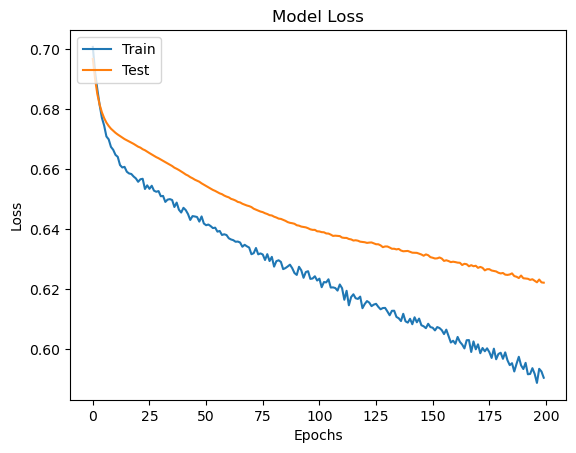

In [23]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.show()

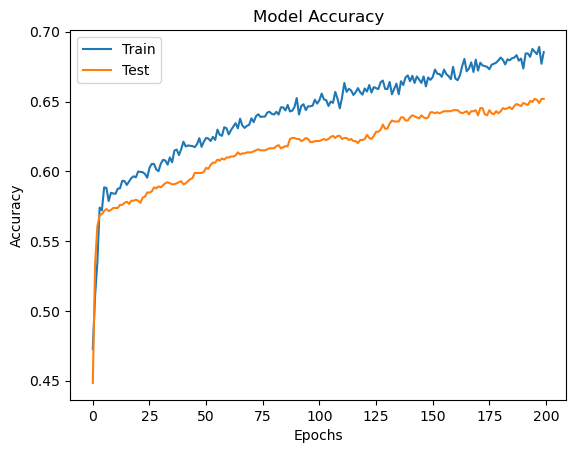

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.show()

In [25]:
y_pred = model.predict(X_test)

57/57 [==============================] - 0s 3ms/step


In [26]:
for y in y_pred:
    print(y)
    print("==============")

[0.5925095  0.40749037]
[0.5676246 0.4323754]
[0.0890381  0.91096187]
[0.8146083 0.1853917]
[0.6922717 0.3077283]
[0.00172064 0.99827933]
[0.41215414 0.58784586]
[0.74717754 0.25282243]
[0.30076525 0.6992348 ]
[4.4221702e-04 9.9955779e-01]
[0.773843   0.22615701]
[0.78623885 0.213761  ]
[0.42468783 0.5753122 ]
[0.6362059  0.36379403]
[0.6398877  0.36011222]
[0.8146021  0.18539792]
[0.1854071  0.81459296]
[0.38963005 0.61037   ]
[0.03712306 0.9628769 ]
[0.919968   0.08003194]
[0.8621705  0.13782944]
[0.82837445 0.17162561]
[0.6105682  0.38943174]
[0.7661972  0.23380284]
[0.55146146 0.44853854]
[0.793499   0.20650095]
[0.03619326 0.96380675]
[0.3464165  0.65358347]
[0.62475574 0.37524423]
[0.7700805  0.22991945]
[0.884219   0.11578094]
[0.05016815 0.9498318 ]
[0.71067566 0.28932437]
[0.4729609 0.5270391]
[0.65146667 0.34853327]
[0.53672767 0.46327227]
[0.01648917 0.98351085]
[0.53263694 0.46736306]
[0.88409245 0.11590748]
[0.50756556 0.49243447]
[0.11999061 0.8800094 ]
[0.85462487 0.1453

[0.77231026 0.22768985]
[0.25119188 0.748808  ]
[0.4846587  0.51534134]
[0.0970441  0.90295583]
[0.39362842 0.6063715 ]
[0.82213336 0.17786655]
[0.33444732 0.66555256]
[0.01543191 0.9845682 ]
[0.66485405 0.33514592]
[0.14524399 0.854756  ]
[0.6869177  0.31308228]
[0.38944387 0.610556  ]
[0.8651876  0.13481246]
[0.10152579 0.89847416]
[0.17628905 0.8237109 ]
[0.18784778 0.81215215]
[0.17145549 0.82854456]
[0.12866376 0.87133634]
[0.14353919 0.85646087]
[0.17087963 0.8291204 ]
[0.72342986 0.27657014]
[0.678422 0.321578]
[0.20051488 0.79948515]
[0.07454633 0.9254536 ]
[0.9096829  0.09031712]
[0.4788212  0.52117884]
[0.76315993 0.23684   ]
[0.9915435  0.00845662]
[0.25679624 0.7432037 ]
[0.11019167 0.88980824]
[0.76742816 0.23257188]
[0.84000516 0.15999472]
[0.00823396 0.99176604]
[0.02041373 0.97958636]
[0.71001595 0.28998414]
[0.8285601  0.17143981]
[0.6973887  0.30261132]
[0.64688694 0.35311306]
[0.75642425 0.24357563]
[0.04208158 0.95791835]
[0.71260047 0.2873994 ]
[0.609999  0.3900009

In [27]:
predicted = []
for y in y_pred:
    max_index = y.tolist().index(max(y))
    predicted.append(max_index)

In [28]:
actual = []
for y in y_test:
    max_index = y.tolist().index(max(y))
    actual.append(max_index)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,predicted)

array([[697, 211],
       [376, 524]], dtype=int64)

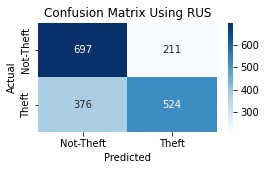

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
TP = 697
FP = 211
TN = 524
FN = 376

# Plot confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap([[TP, FP], [FN, TN]], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not-Theft', 'Theft'], yticklabels=['Not-Theft', 'Theft'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Using RUS')
plt.show()

In [30]:
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.65      0.77      0.70       908
           1       0.71      0.58      0.64       900

    accuracy                           0.68      1808
   macro avg       0.68      0.67      0.67      1808
weighted avg       0.68      0.68      0.67      1808



In [31]:
cm=classification_report(actual,predicted)

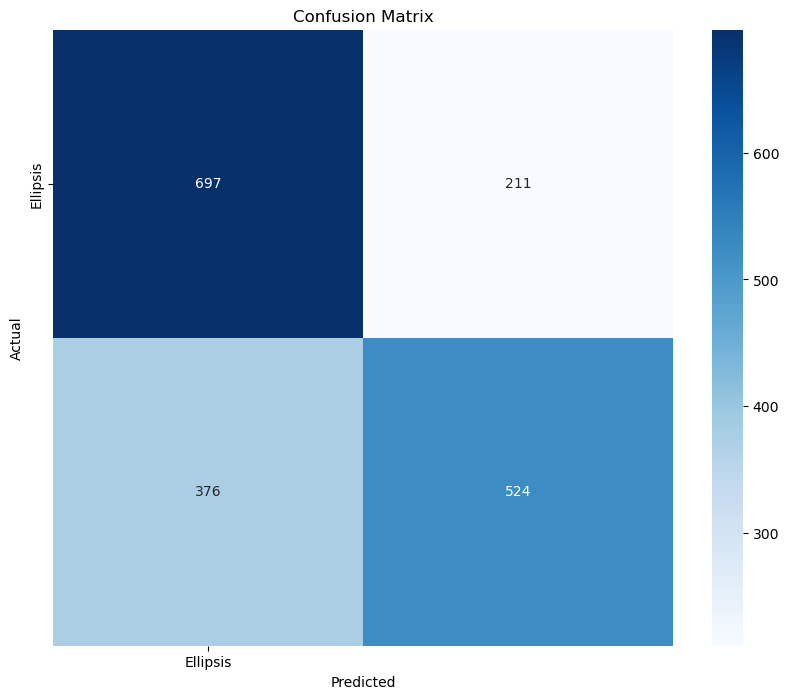

In [32]:
import seaborn as sns
cm = confusion_matrix(actual, predicted)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[...], yticklabels=[...])  # Replace [...] with your class labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

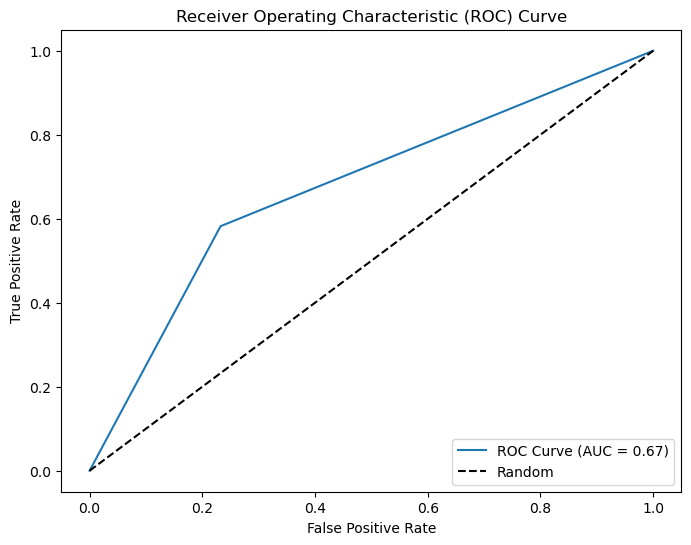

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(actual, predicted)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [34]:
df = pd.DataFrame(X_test).head(10)
#df = pd.DataFrame(X_testNormal)
df.to_csv("D:\ElectricityTheft\\RandomSampling\Xtest.csv")


In [35]:
df = pd.DataFrame(X_train).head(10)

df.to_csv("D:\ElectricityTheft\\RandomSampling\Xtrain.csv")

In [36]:
val1=[]
val2=[]
for y in y_pred:
    print(y[0])
    print(y[1])
    print("====")
    val1.append(y[0])
    val2.append(y[1])

0.5925095
0.40749037
====
0.5676246
0.4323754
====
0.089038104
0.91096187
====
0.8146083
0.1853917
====
0.6922717
0.3077283
====
0.0017206355
0.99827933
====
0.41215414
0.58784586
====
0.74717754
0.25282243
====
0.30076525
0.6992348
====
0.00044221702
0.9995578
====
0.773843
0.22615701
====
0.78623885
0.213761
====
0.42468783
0.5753122
====
0.6362059
0.36379403
====
0.6398877
0.36011222
====
0.8146021
0.18539792
====
0.1854071
0.81459296
====
0.38963005
0.61037
====
0.037123058
0.9628769
====
0.919968
0.08003194
====
0.8621705
0.13782944
====
0.82837445
0.17162561
====
0.6105682
0.38943174
====
0.7661972
0.23380284
====
0.55146146
0.44853854
====
0.793499
0.20650095
====
0.03619326
0.96380675
====
0.3464165
0.65358347
====
0.62475574
0.37524423
====
0.7700805
0.22991945
====
0.884219
0.11578094
====
0.05016815
0.9498318
====
0.71067566
0.28932437
====
0.4729609
0.5270391
====
0.65146667
0.34853327
====
0.53672767
0.46327227
====
0.016489174
0.98351085
====
0.53263694
0.46736306
====
0.

In [37]:
df = pd.DataFrame({'Actual': actual, 'Softmax Predicted Value 1': val1, 'Softmax Predicted Value 2': val2, 'Predicted Result': predicted})
df.to_csv("D:\ElectricityTheft\RandomSampling\ActualPredicted.csv")

In [38]:
df = pd.DataFrame({'Training Accuracy': history.history['accuracy'], 'Test Accuracy': history.history['val_accuracy']})
df.to_csv("D:\ElectricityTheft\RandomSampling\pcaAccuracies.csv")